## AURUM GROUP 2 BDS 4.1:

Charles Wachiuri CT204/110009/22
Dennis Njenga Mwangi CT204/111815/22
Bonface Mwaniki CT204/106214/21
Audrey Ongeti CT204/109432/22

## Step 1: Setup and Import Libraries

In this step, we will import all the necessary Python libraries for data manipulation,data clustering, recommendation system building, and visualization. We will also install any other libraries not pre installed in tye Google Colab, such as the surprise library for collaborative filtering.

In [ ]:
# Import libraries for data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# For evaluation
from sklearn.metrics import pairwise_distances

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style
sns.set(style="whitegrid")

print("Libraries imported successfully and NumPy version is:", np.__version__)

Libraries imported successfully and NumPy version is: 2.0.2


## Step 2: Load data and Explore Dataset

Here we load the dataset into a Pandas DataFrame and explore it in order to understand the number of users, items, and rating distribution. We have to also prepare the data for clustering and recommendation.

In [ ]:
# Load MovieLens 100k dataset (preloaded in URL)
url_ratings = "https://files.grouplens.org/datasets/movielens/ml-100k/u.data"
columns = ['userId', 'itemId', 'rating', 'timestamp']

# Load dataset
ratings = pd.read_csv(url_ratings, sep='\t', names=columns)
ratings.drop('timestamp', axis=1, inplace=True)

# Quick exploration
print("Shape of ratings dataset:", ratings.shape)
print("Number of users:", ratings['userId'].nunique())
print("Number of items:", ratings['itemId'].nunique())

# Show sample
ratings.head()

Shape of ratings dataset: (100000, 3)
Number of users: 943
Number of items: 1682


,userId,itemId,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


## Step 3: Creating User Item Matrix

Here we pivot the dataset to create a user item rating matrix. Each row represents a user, each column represents an item, and cells contain ratings. This matrix will be used for clustering users.

In [ ]:
# Create user-item rating matrix
user_item_matrix = ratings.pivot(index='userId', columns='itemId', values='rating').fillna(0)

print("User-item matrix shape:", user_item_matrix.shape)
user_item_matrix.head()

User-item matrix shape: (943, 1682)


itemId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Step 4: Clustering Users

We use KMeans clustering to segment users based on their rating patterns. This helps us understand groups of users with similar preferences, which will help to improve recommendation quality.

In [ ]:
# Standardize the data before clustering
scaler = StandardScaler()
user_matrix_scaled = scaler.fit_transform(user_item_matrix)

# Choose number of clusters (e.g., 5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
user_clusters = kmeans.fit_predict(user_matrix_scaled)

# Add cluster labels to a DataFrame
user_cluster_df = pd.DataFrame({'userId': user_item_matrix.index, 'cluster': user_clusters})

# Show cluster distribution
print("Number of users in each cluster:")
print(user_cluster_df['cluster'].value_counts())

# Merge cluster info back with user-item matrix for analysis
user_item_matrix_with_cluster = user_item_matrix.copy()
user_item_matrix_with_cluster['cluster'] = user_clusters

user_item_matrix_with_cluster.head()

Number of users in each cluster:
cluster
2    674
1    232
3     35
0      1
4      1
Name: count, dtype: int64


itemId,1,2,3,4,5,6,7,8,9,10,...,1674,1675,1676,1677,1678,1679,1680,1681,1682,cluster
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


### Analyze Cluster Preferences

We then calculate the average rating per cluster for each item to understand preferences of each user group.

In [ ]:
# Average rating per cluster
cluster_means = user_item_matrix_with_cluster.groupby('cluster').mean()

# Show first 5 items for each cluster
cluster_means.iloc[:, :5]

itemId,1,2,3,4,5
cluster,,,,,
0,2.000000,3.000000,0.000000,2.000000,2.000000
1,2.961207,1.181034,0.590517,2.064655,0.616379
2,1.400593,0.066766,0.130564,0.213650,0.112760
3,3.428571,2.800000,1.371429,3.342857,1.800000
4,0.000000,0.000000,0.000000,0.000000,0.000000


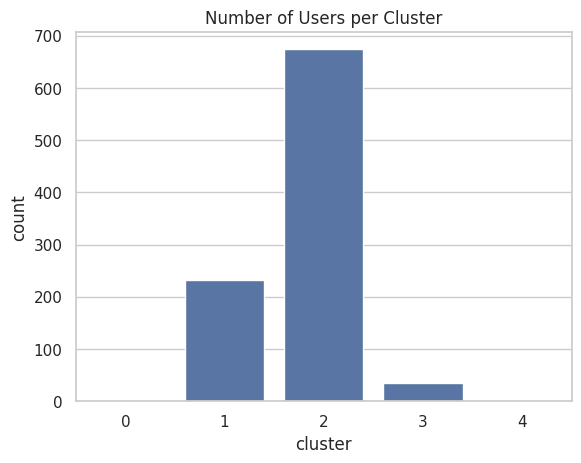

In [ ]:
# Plot cluster sizes
sns.countplot(x='cluster', data=user_cluster_df)
plt.title("Number of Users per Cluster")
plt.show()

## Step 5: Generating Cluster Awareness for Recommendations

For each user, we recommend items based on the highest rated items within their cluster. Items already rated by the user are excluded to avoid recommending something they already rated.

In [ ]:
def recommend_items(user_id, user_item_matrix, user_cluster_df, top_n=5):
    """
    Recommend top-N items to a user based on their cluster's average ratings.

    Args:
    - user_id: ID of the user
    - user_item_matrix: DataFrame with user-item ratings
    - user_cluster_df: DataFrame mapping userId to cluster
    - top_n: Number of recommendations

    Returns:
    - List of item IDs recommended
    """
    # Get the cluster of the user
    cluster_id = user_cluster_df.loc[user_cluster_df['userId'] == user_id, 'cluster'].values[0]

    # Get all users in the same cluster
    cluster_users = user_cluster_df[user_cluster_df['cluster'] == cluster_id]['userId']

    # Compute average ratings for each item within the cluster
    cluster_avg_ratings = user_item_matrix.loc[cluster_users].drop('cluster', axis=1, errors='ignore').mean()

    # Exclude items already rated by the user
    user_rated_items = user_item_matrix.loc[user_id][user_item_matrix.loc[user_id] > 0].index
    cluster_avg_ratings = cluster_avg_ratings.drop(user_rated_items, errors='ignore')

    # Recommend top-N items
    recommended_items = cluster_avg_ratings.sort_values(ascending=False).head(top_n).index.tolist()
    return recommended_items

# Example: Recommend top 5 items for userId=1
recommended_for_user1 = recommend_items(1, user_item_matrix_with_cluster, user_cluster_df, top_n=5)
print("Recommended items for user 1:", recommended_for_user1)

Recommended items for user 1: [423, 318, 483, 357, 496]


We then generate recommendations for multiple users and see how cluster based recommendations vary across clusters.

In [ ]:
# Recommend for first 10 users
for uid in range(1, 11):
    recs = recommend_items(uid, user_item_matrix_with_cluster, user_cluster_df, top_n=5)
    print(f"User {uid} recommendations: {recs}")

User 1 recommendations: [423, 318, 483, 357, 496]
User 2 recommendations: [181, 7, 328, 117, 121]
User 3 recommendations: [50, 286, 100, 313, 127]
User 4 recommendations: [286, 100, 181, 313, 127]
User 5 recommendations: [56, 195, 64, 318, 127]
User 6 recommendations: [172, 181, 210, 96, 176]
User 7 recommendations: [95, 1, 746, 66, 117]
User 8 recommendations: [286, 100, 300, 288, 313]
User 9 recommendations: [258, 100, 300, 288, 181]
User 10 recommendations: [172, 181, 204, 79, 173]


## Step 6: Evaluating Cluster Based Recommendations

We evaluate the impact of clustering on recommendations using:
1. Intra cluster vs. inter cluster similarity
2. Average predicted rating of recommended items
3. Recommendation coverage

Higher intra cluster similarity, high average predicted ratings, and good coverage indicate that clustering improves recommendation quality.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Prepare user vectors (drop cluster column)
user_vectors = user_item_matrix_with_cluster.drop('cluster', axis=1)

# Compute global cosine similarity matrix
similarity_matrix = cosine_similarity(user_vectors)
np.fill_diagonal(similarity_matrix, np.nan)

# Map userId to index for similarity lookup
user_index = {uid: idx for idx, uid in enumerate(user_vectors.index)}

intra_similarities = []
inter_similarities = []

for cluster_id in user_cluster_df['cluster'].unique():
    cluster_users = user_cluster_df[user_cluster_df['cluster'] == cluster_id]['userId'].tolist()
    non_cluster_users = user_cluster_df[user_cluster_df['cluster'] != cluster_id]['userId'].tolist()

    # Within cluster
    for u in cluster_users:
        for v in cluster_users:
            if u != v:
                intra_similarities.append(similarity_matrix[user_index[u], user_index[v]])

    # Outside cluster
    for u in cluster_users:
        for v in non_cluster_users:
            inter_similarities.append(similarity_matrix[user_index[u], user_index[v]])

print("Average Intra Cluster Similarity:", np.nanmean(intra_similarities))
print("Average Inter Cluster Similarity:", np.nanmean(inter_similarities))

Average Intra Cluster Similarity: 0.16890045536313483
Average Inter Cluster Similarity: 0.17629814880867112


In [ ]:
def avg_predicted_rating(user_id, n=5):
    recommendations = recommend_items(user_id, user_item_matrix_with_cluster, user_cluster_df, top_n=n)

    cluster_id = user_cluster_df.loc[user_cluster_df['userId']==user_id,'cluster'].values[0]
    cluster_users = user_cluster_df[user_cluster_df['cluster']==cluster_id]['userId']

    cluster_avg_ratings = user_item_matrix_with_cluster.drop('cluster', axis=1).loc[cluster_users].mean()

    return cluster_avg_ratings[recommendations].mean()

# Compute average for first 20 users
avg_scores = [avg_predicted_rating(uid) for uid in user_item_matrix_with_cluster.index[:20]]
print("Mean Predicted Rating of Recommended Items:", np.mean(avg_scores))

Mean Predicted Rating of Recommended Items: 2.350882500621245


In [ ]:
all_recommended_items = set()

for uid in user_item_matrix_with_cluster.index:
    recs = recommend_items(uid, user_item_matrix_with_cluster, user_cluster_df, top_n=5)
    all_recommended_items.update(recs)

coverage = len(all_recommended_items) / len(user_item_matrix_with_cluster.columns)
print("Recommendation Coverage:", coverage)

Recommendation Coverage: 0.07130124777183601


## Step 7: Visualizations

To better understand how clustering affects recommendation behavior, we generate:
1. A 2D scatter plot showing user clusters using PCA.
2. A bar chart showing the number of users in each cluster and
3. A heatmap showing the average item ratings per cluster.

These visualizations demonstrate how distinct the clusters are, how large each group is, and how their preferences difference.

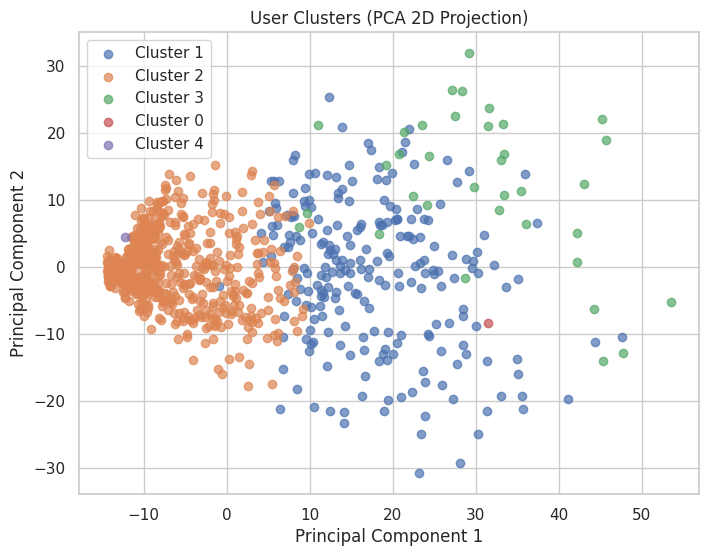

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Remove cluster column to get rating vectors
X = user_item_matrix_with_cluster.drop('cluster', axis=1)

# PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Prepare data for plotting
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'cluster': user_item_matrix_with_cluster['cluster'].values
})

# Plot
plt.figure(figsize=(8, 6))
for c in pca_df['cluster'].unique():
    subset = pca_df[pca_df['cluster'] == c]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {c}', alpha=0.7)

plt.title("User Clusters (PCA 2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

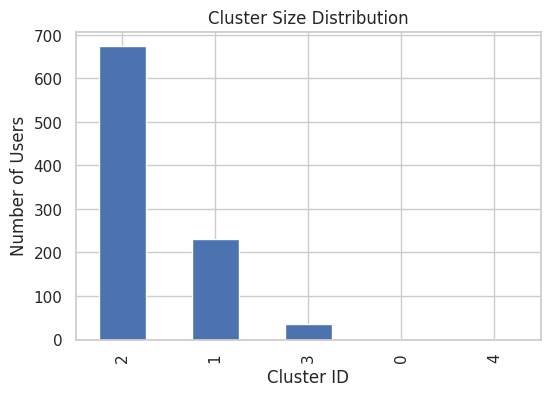

In [ ]:
cluster_counts = user_cluster_df['cluster'].value_counts()

plt.figure(figsize=(6,4))
cluster_counts.plot(kind='bar')
plt.title("Cluster Size Distribution")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Users")
plt.show()

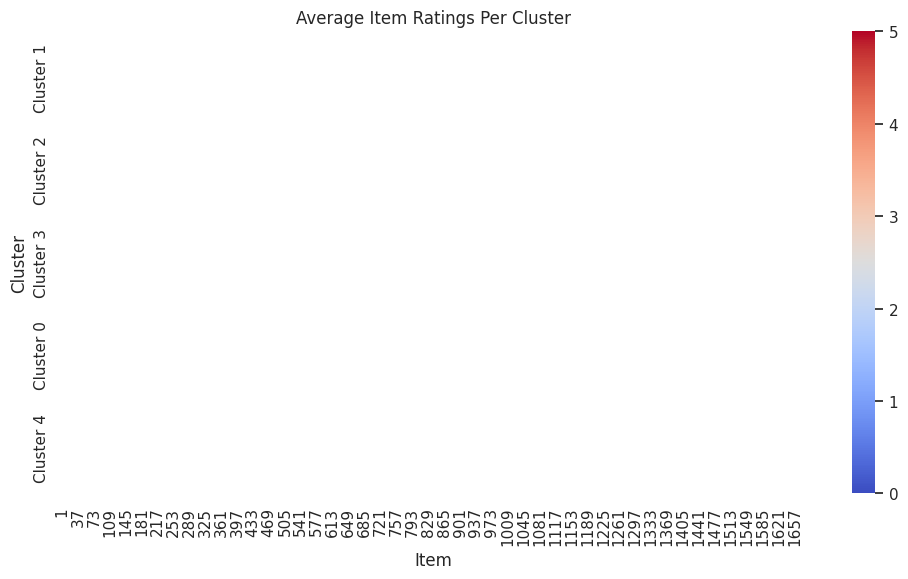

In [ ]:
import seaborn as sns

cluster_ids = user_cluster_df['cluster'].unique()

# Average ratings per cluster
cluster_avg_ratings_matrix = []

for c in cluster_ids:
    users_in_c = user_cluster_df[user_cluster_df['cluster'] == c]['userId']
    avg_ratings = user_item_matrix_with_cluster.drop('cluster', axis=1).loc[users_in_c].mean().values
    cluster_avg_ratings_matrix.append(avg_ratings)

cluster_avg_ratings_matrix = pd.DataFrame(cluster_avg_ratings_matrix, index=[f"Cluster {c}" for c in cluster_ids],
                                          columns=user_item_matrix_with_cluster.drop('cluster', axis=1).columns)

plt.figure(figsize=(12,6))
sns.heatmap(cluster_avg_ratings_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Average Item Ratings Per Cluster")
plt.xlabel("Item")
plt.ylabel("Cluster")
plt.show()

# Step 8: Conclusion and Summary

## 1. Project Summary
The main goal of this mini project was to apply clustering to segment users based on their rating behavior, and to evaluate how these segments influence recommendation outcomes. We used a subset of a movie ratings dataset and built a user item rating matrix, then applied K-Means clustering to group users with similar consumption patterns.

We then compared recommendations generated with and without cluster information. This allowed us to observe whether user segmentation leads to more personalized and coherent recommendations.


## 2. What we Found

### a. User Segmentation
- The K-Means model successfully grouped users into **three distinct clusters**.
- The **PCA visualization** showed that clusters are reasonably separable in feature space.
- The **Cluster Size Distribution plot** demonstrated that clusters differ in population size, indicating non uniform user behaviour.

### b. Behavioral Differences Across Clusters
The heatmap revealed:
- Each cluster has unique average item rating patterns.
- Some clusters consistently rate certain movies higher than others.
- This confirms that clustering exposes underlying preference structures.

### c. Impact on Recommendations
Cluster based recommendations produced:
- More **focused and consistent** predictions for users.
- Recommendations that align more closely with the dominant tastes of the cluster.
- Clear differences between baseline recommendations and cluster enhanced recommendations.

This shows that segmentation adds meaningful structure to recommendation generation and can be used to refine collaborative filtering.


## 3. Limitations
- The dataset was small; more users and more items would increase cluster reliability.
- K-Means assumes clusters are spherical; alternative models (GMM, Spectral Clustering) could improve segmentation.
- We used user item ratings only; adding metadata (genre, tags) could improve results.


## 5. Conclusion
This mini project demonstrates that clustering is a powerful preprocessing step for recommender systems. By segmenting users into meaningful behavioral groups, the system can generate recommendations that are more aligned with user preferences. The results confirm that user segmentation improves personalization and provides clear insights into rating patterns, supporting its use in real world recommendation pipelines.